## <b> Plant Disease Detection </b>

In this project, a Convolutional Neural Network will be employed in the classification of plant leaves. The model will be built using the tensorflow and keras modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2 as cv
import random
import os
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

### Data Inspection & Exploration

We will plot random images from our dataset and observe their widths and heights

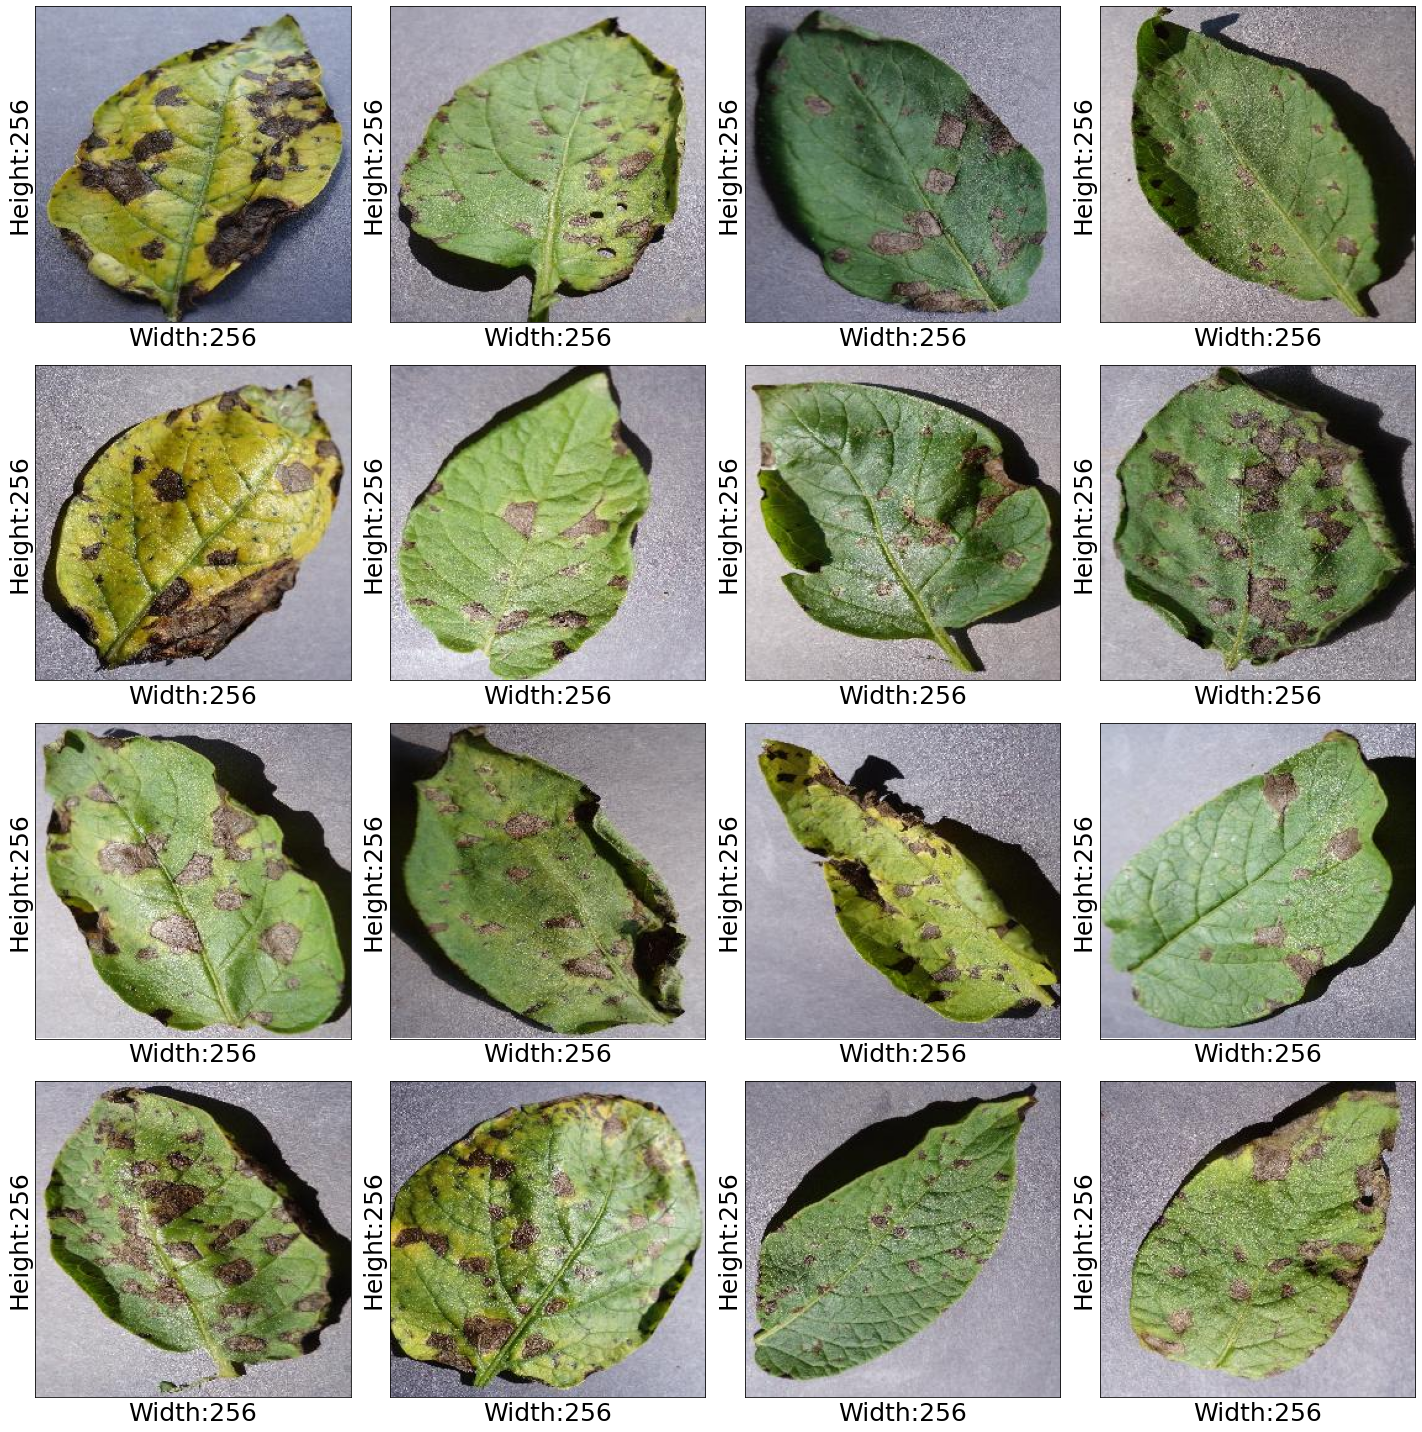

In [2]:
# Plotting 16 images from the dataset
plt.figure(figsize=(20,20))
path = 'Plant_images_pianalytix/Potato___Early_blight'
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
    plt.xlabel("Width:" + str(rand_img.shape[1]), fontsize=25)
    plt.ylabel("Height:" + str(rand_img.shape[0]), fontsize=25)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(rand_img)

Next, we convert the images to numpy arrays with size `256 x 256`, with a function

In [3]:
# Converting the images to arrays
def convert_image_to_array(image_path):
    try:
        image = cv.imread(image_path)
        if image is not None:
            image = cv.resize(image, (256, 256))
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print("Error:", e)
        return None

Load in the images and their labels into their respective labels

In [4]:
dir = 'Plant_images_pianalytix'
root_dir = os.listdir(dir)
image_list, label_list = [], []
all_lablels = ['Corn-Common_rust', 'Potato-Early_bright', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

for directory in root_dir:
    plant_image_list = os.listdir(f"{dir}/{directory}")
    temp += 1
    for file in plant_image_list:
        image_path = f"{dir}/{directory}/{file}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

In [5]:
len(image_list) == len(label_list)

True

Plot the value count for each class to see if it is imbalanced

<AxesSubplot:>

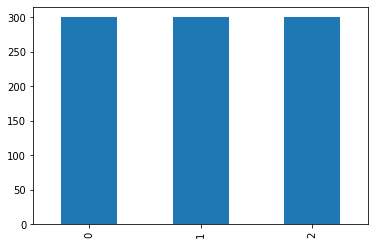

In [6]:
pd.DataFrame(label_list)[0].value_counts().plot.bar()

# We see a perfect balance

Check to see the shape of each image and the number of labels

In [7]:
image_list[0].shape, len(label_list), len(image_list)

((256, 256, 3), 900, 900)

Splitting the data into training and test sets, turning the train and test lists to arrays, normalizing and reshaping them.

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(image_list, label_list, test_size = 0.3, shuffle=True, random_state=42)
Xtrain = (np.array(Xtrain, dtype = np.float32)/255).reshape(-1, 256, 256, 3)
Xtest = (np.array(Xtest, dtype = np.float32)/255).reshape(-1, 256, 256, 3)

In [10]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

### Building the Model

In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 112896)            0         
                                                                 
 dense (Dense)               (None, 64)                7

In [12]:
model.compile(
    optimizer = Adam(0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [14]:
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2)

In [15]:
epochs = 50
batch_size = 128
r = model.fit(Xtrain, ytrain, batch_size = batch_size, epochs = epochs, validation_data = (Xval, yval))

Epoch 1/50
4/4 [==============================] - 414s 92s/step - loss: 0.9081 - accuracy: 0.5933 - val_loss: 0.5844 - val_accuracy: 0.8730
Epoch 2/50
4/4 [==============================] - 271s 75s/step - loss: 0.4697 - accuracy: 0.9405 - val_loss: 0.3294 - val_accuracy: 0.9444
Epoch 3/50
4/4 [==============================] - ETA: 0s - loss: 0.2777 - accuracy: 0.9663 

: 

Saving the trained model with different methods

In [ ]:
model.save('plant_disease.h5')

# Serialise model to json
json_model = model.to_json()

# Save the model architecture to JSON file
with open('plant_model.json', 'w') as json_file:
    json_file.write(json_model)
    
# Saving the weights of the model
model.save_weights('plant_model_weights.h5')

Plot the model accuracy

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(r.history['accuracy'], color='r')
plt.plot(r.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

Evaluating the model

In [ ]:
scores = model.evaluate(Xtest, ytest)
print(f'Test accuracy: {scores[1]*100}%%')

### Conclusion

This model is highly beneficial, as it can be used by players in the agricultural sector to increase crop yield by early detection of disease in crops.